## import

In [1]:
from query import KimAmm
from utils import get_client, query_until_end

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
KIM_AMM_ENDPOINT = "https://api.goldsky.com/api/public/project_clmqdcfcs3f6d2ptj3yp05ndz/subgraphs/kim-amm/0.0.1/gn"

In [4]:
client = get_client(KIM_AMM_ENDPOINT)
dd = KimAmm(client)

having a closer look at schemas and fields, this exchange looks like a uniswap-v2 fork.

Stats fetched & calculated & visualized:

- daily new and total pairs available within the exchange.
- daily new and total (unique) tokens available within the exchange.
- daily & total volume denominated in eth (aggregated across exchange).
- daily & total volume denominated in usd (aggregated across exchange).
- daily & total fee denominated in usd (aggregated across exchange).
- total tvl denominated in eth (aggregated across exchange).
- total tvl denominated in usd (aggregated across exchange).
- daily new and total transactions (aggregated across exchange).
- daily new and total swaps (aggregated across exchange).
- daily & total volume denominated in usd (for each pair).
- tvl denominated in usd (for each pair).
- daily & total fees denominated in usd (for each pair).
- daily new and total transactions (for each pair).
- daily new and total swaps (for each pair).

### Pools & Tokens

In [5]:
pools_data = await dd.query_pools()
df_pools_data = dd.parse_pools_data(pools_data)
df_pools = dd.get_df_pools(df_pools_data)
df_tokens = dd.df_tokens(df_pools_data)

In [6]:
df_pools

,new_pool_count,total_pool_count
2024-01-05 00:00:00+00:00,1,1
2024-01-06 00:00:00+00:00,0,1
2024-01-07 00:00:00+00:00,0,1
2024-01-08 00:00:00+00:00,0,1
2024-01-09 00:00:00+00:00,0,1
2024-01-10 00:00:00+00:00,0,1
2024-01-11 00:00:00+00:00,0,1
2024-01-12 00:00:00+00:00,0,1
2024-01-13 00:00:00+00:00,1,2
2024-01-14 00:00:00+00:00,0,2


In [7]:
df_tokens

,new_token_count,total_token_count
2024-01-05 00:00:00+00:00,2,2
2024-01-06 00:00:00+00:00,0,2
2024-01-07 00:00:00+00:00,0,2
2024-01-08 00:00:00+00:00,0,2
2024-01-09 00:00:00+00:00,0,2
2024-01-10 00:00:00+00:00,0,2
2024-01-11 00:00:00+00:00,0,2
2024-01-12 00:00:00+00:00,0,2
2024-01-13 00:00:00+00:00,1,3
2024-01-14 00:00:00+00:00,0,3


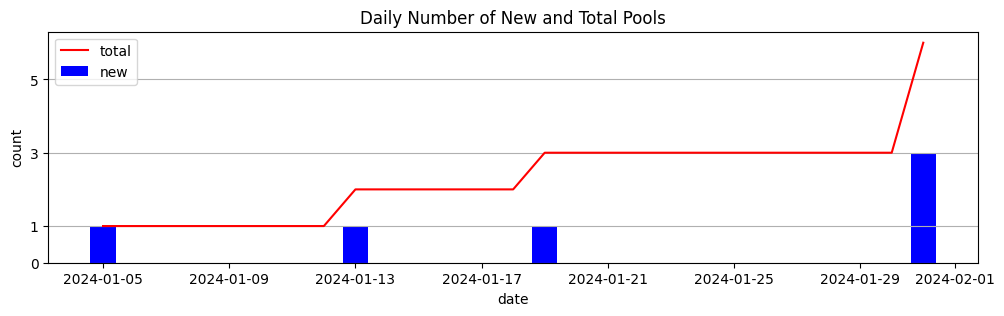

In [8]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_pools.index,
    df_pools["new_pool_count"],
    color="blue",
    label="new",
)
ax.plot(
    df_pools.index,
    df_pools["total_pool_count"],
    color="red",
    label="total",
)
plt.grid(axis="y")
plt.title("Daily Number of New and Total Pools")
plt.xlabel("date")
plt.ylabel("count")
plt.yticks(
    list(
        set(
            df_pools["new_pool_count"].values
        ).union(
            set(
                range(0, df_pools["total_pool_count"].max(), 5)
            )
        )
    )
)
plt.legend()
plt.show()

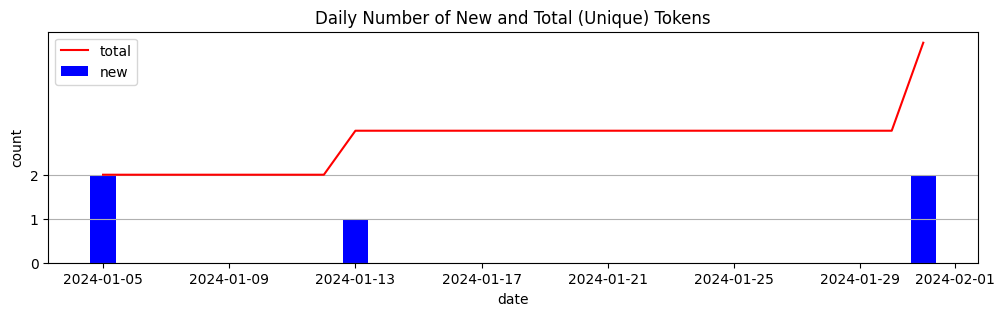

In [9]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_tokens.index,
    df_tokens["new_token_count"],
    color="blue",
    label="new",
)
ax.plot(
    df_tokens.index,
    df_tokens["total_token_count"],
    color="red",
    label="total",
)
plt.grid(axis="y")
plt.title("Daily Number of New and Total (Unique) Tokens")
plt.xlabel("date")
plt.ylabel("count")
plt.yticks(
    list(
        set(
            df_tokens["new_token_count"].values
        ).union(
            set(
                range(0, df_tokens["total_token_count"].max(), 5)
            )
        )
    )
)
plt.legend()
plt.show()

### Aggregated / Total Stats (TVL, Volume, Fees)

In [10]:
exchange_day_data = await dd.query_exchange_day_data()
df_exchange_day_data = dd.parse_exchange_day_data(exchange_day_data)

swaps_data = await dd.query_swaps_data()
df_swaps_data = dd.parse_swaps_data(swaps_data)

df_exchange_day = dd.get_df_exchange_day(df_exchange_day_data, df_swaps_data)

In [11]:
df_exchange_day

,id,dailyVolumeETH,dailyVolumeUSD,dailyVolumeUntracked,totalLiquidityETH,totalLiquidityUSD,dailyFeeETH,dailyFeeUSD,totalTransactions,totalVolumeETH,totalVolumeUSD,totalFeeUSD,totalFeeETH,dailyTransactions,new_swap_count,total_swap_count
date,,,,,,,,,,,,,,,,
2024-01-13 00:00:00+00:00,19735,0.000000,0.000000,0.000000,2.000000,5120.000000,0.000000,0.000000,2,0.000000,0.000000,0.000000,0.000000,2,NaN,NaN
2024-01-15 00:00:00+00:00,19737,0.015457,40.192757,40.192757,3.969012,10320.568872,0.000046,0.120289,5,0.015457,40.192757,0.120289,0.000046,3,2.0,2.0
2024-01-16 00:00:00+00:00,19738,0.051054,120.369227,120.369227,4.153600,9792.794739,0.000150,0.352796,7,0.066511,160.561983,0.473085,0.000196,2,1.0,3.0
2024-01-17 00:00:00+00:00,19739,0.003298,7.800348,7.800348,4.147012,9822.665087,0.000010,0.023428,17,0.069810,168.362331,0.496513,0.000206,10,10.0,13.0
2024-01-19 00:00:00+00:00,19741,0.013540,32.071093,32.071093,4.567487,10818.609716,0.000040,0.094196,25,0.083350,200.433424,0.590709,0.000246,8,6.0,19.0
2024-01-20 00:00:00+00:00,19742,0.012130,28.487750,28.487750,4.600284,10838.785973,0.000036,0.085408,30,0.095480,228.921174,0.676117,0.000282,5,3.0,22.0
2024-01-21 00:00:00+00:00,19743,0.006879,16.208712,16.208712,4.598759,10852.713856,0.000021,0.048535,37,0.102359,245.129886,0.724652,0.000303,7,7.0,29.0
2024-01-22 00:00:00+00:00,19744,0.019941,46.629199,46.629199,4.598878,10852.401233,0.000060,0.139458,39,0.122300,291.759085,0.864110,0.000362,2,2.0,31.0
2024-01-24 00:00:00+00:00,19746,0.059275,136.859485,136.859485,4.675841,10526.537569,0.000177,0.409584,53,0.181575,428.618570,1.273695,0.000540,14,13.0,44.0


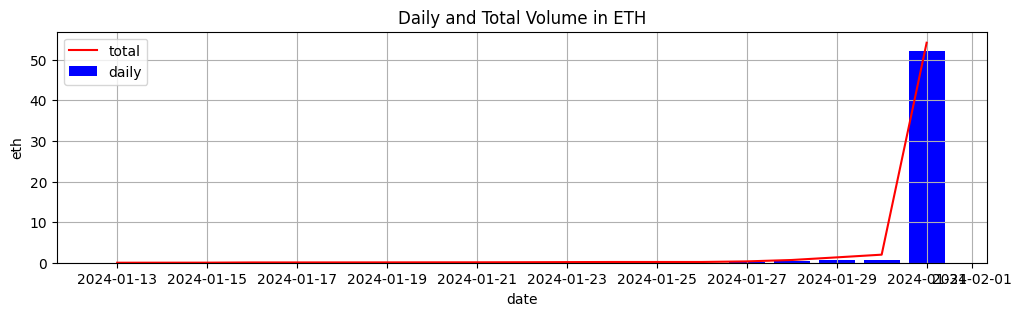

In [12]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["dailyVolumeETH"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalVolumeETH"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Volume in ETH")
plt.xlabel("date")
plt.ylabel("eth")
plt.legend()
plt.show()

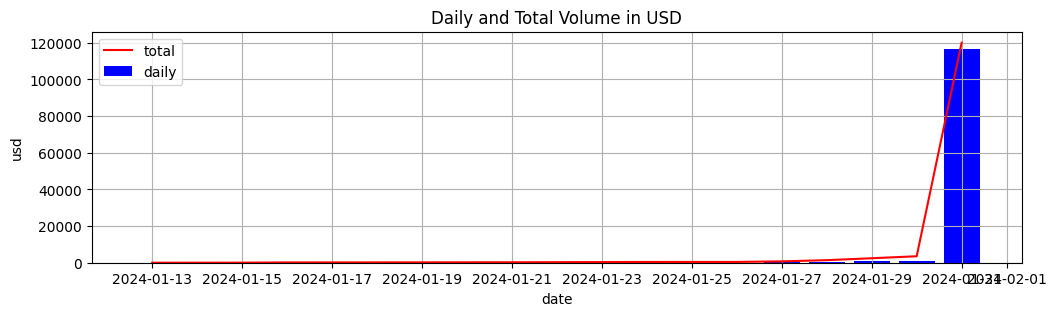

In [13]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["dailyVolumeUSD"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalVolumeUSD"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Volume in USD")
plt.xlabel("date")
plt.ylabel("usd")
plt.legend()
plt.show()

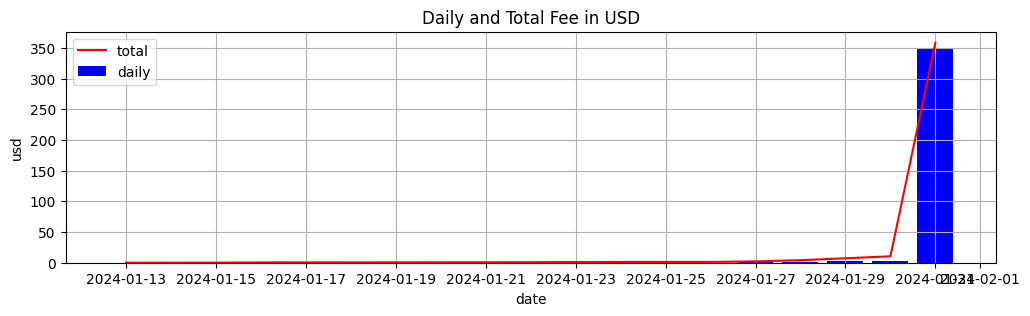

In [14]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["dailyFeeUSD"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalFeeUSD"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Fee in USD")
plt.xlabel("date")
plt.ylabel("usd")
plt.legend()
plt.show()

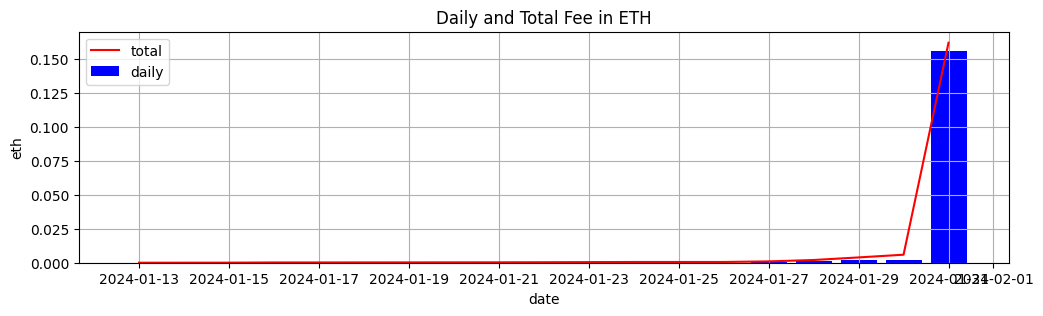

In [15]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["dailyFeeETH"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalFeeETH"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Fee in ETH")
plt.xlabel("date")
plt.ylabel("eth")
plt.legend()
plt.show()

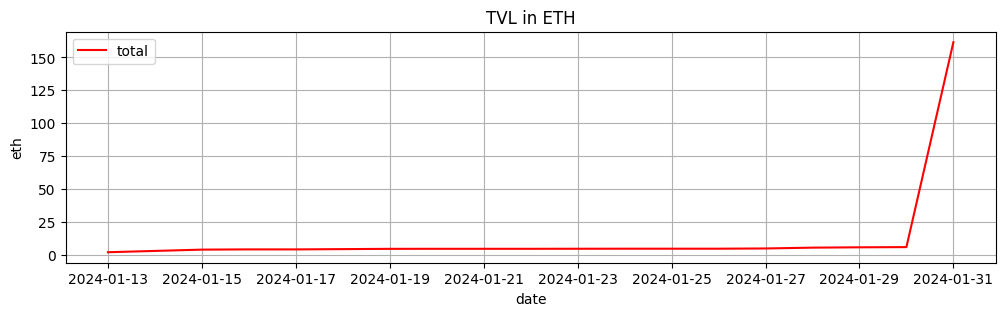

In [16]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalLiquidityETH"],
    color="red",
    label="total",
)
plt.grid()
plt.title("TVL in ETH")
plt.xlabel("date")
plt.ylabel("eth")
plt.legend()
plt.show()

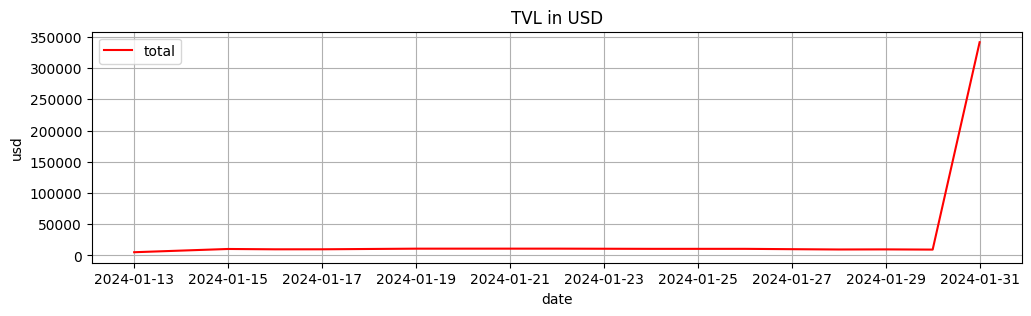

In [17]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalLiquidityUSD"],
    color="red",
    label="total",
)
plt.grid()
plt.title("TVL in USD")
plt.xlabel("date")
plt.ylabel("usd")
plt.legend()
plt.show()

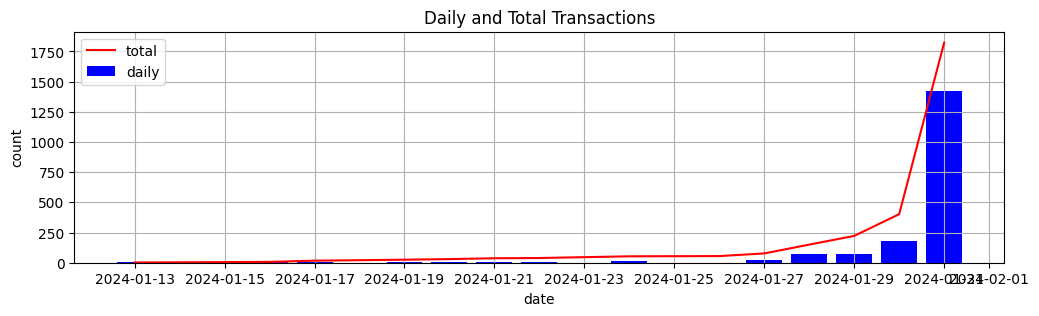

In [18]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["dailyTransactions"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalTransactions"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Transactions")
plt.xlabel("date")
plt.ylabel("count")
plt.legend()
plt.show()

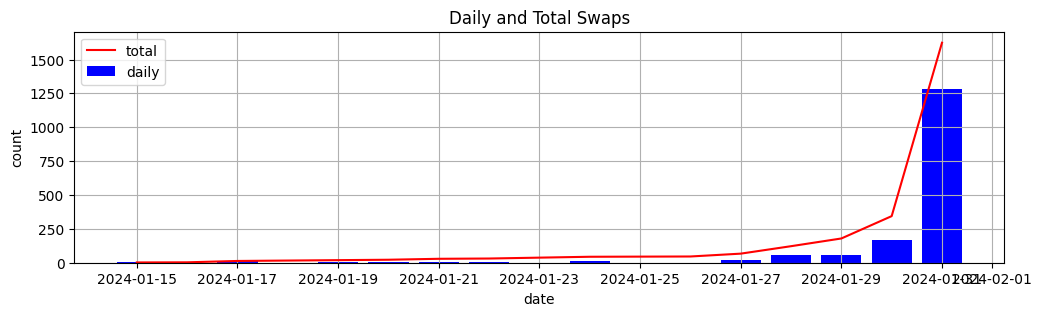

In [19]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["new_swap_count"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["total_swap_count"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Swaps")
plt.xlabel("date")
plt.ylabel("count")
plt.legend()
plt.show()

### Pool Stats (TVL, Volume, Fees)

In [20]:
pool_day_data = await dd.query_pool_day_data()
df_pool_day_data = dd.parse_pool_day_data(pool_day_data)

swaps_data = await dd.query_swaps_data()
df_swaps_data_by_pool = dd.parse_swaps_data_by_pool(swaps_data)

df_pool_day = dd.get_df_pool_day(
    df_pool_day_data,
    df_swaps_data_by_pool,
)

In [21]:
df_pool_day.head(10)

,id,dailyVolumeUSD,totalLiquidityUSD,dailyFeeUSD,dailyTransactions,pool_id,new_swap_count,total_swap_count,totalVolumeUSD,totalTransactions,totalFeeUSD
date,,,,,,,,,,,
2024-01-19,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19741,16.371676,959.542604,0.047090,4,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9,3.0,3.0,16.371676,4.0,0.047090
2024-01-20,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19742,0.000000,982.772312,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-21,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19743,1.219821,985.394625,0.003528,1,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9,1.0,4.0,17.591497,5.0,0.050618
2024-01-24,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19746,2.382728,964.788067,0.006740,1,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9,1.0,5.0,19.974226,6.0,0.057358
2024-01-27,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19749,16.729863,932.625227,0.048475,3,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9,3.0,8.0,36.704089,9.0,0.105833
2024-01-28,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19750,63.588424,961.548977,0.187879,13,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9,11.0,19.0,100.292513,22.0,0.293712
2024-01-29,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19751,58.693132,1002.771991,0.181546,11,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9,9.0,28.0,158.985645,33.0,0.475258
2024-01-30,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19752,31.325182,986.731721,0.090948,14,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9,11.0,39.0,190.310827,47.0,0.566207
2024-01-31,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9-19753,26872.460551,101561.621091,80.546755,343,0x047cf4b081ee80d2928cb2ce3f3c4964e26eb0b9,328.0,367.0,27062.771379,390.0,81.112961


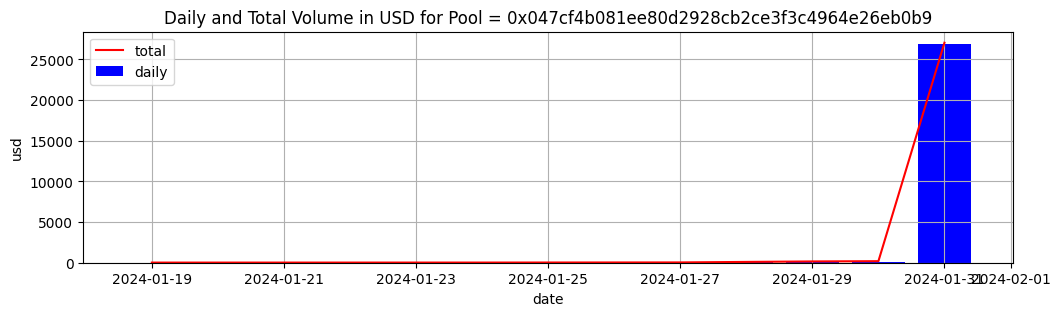

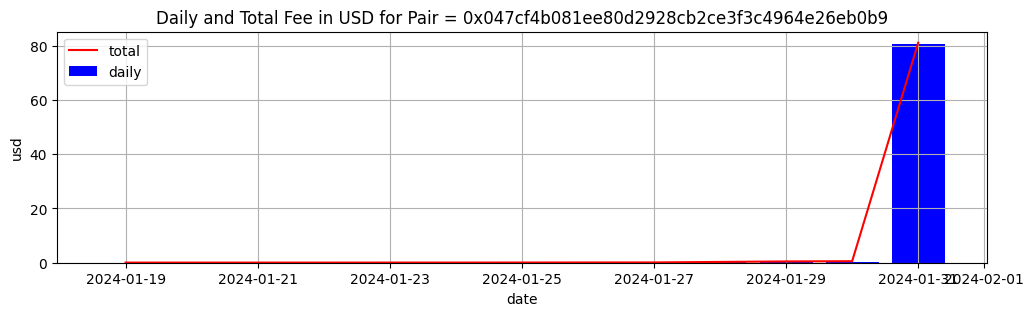

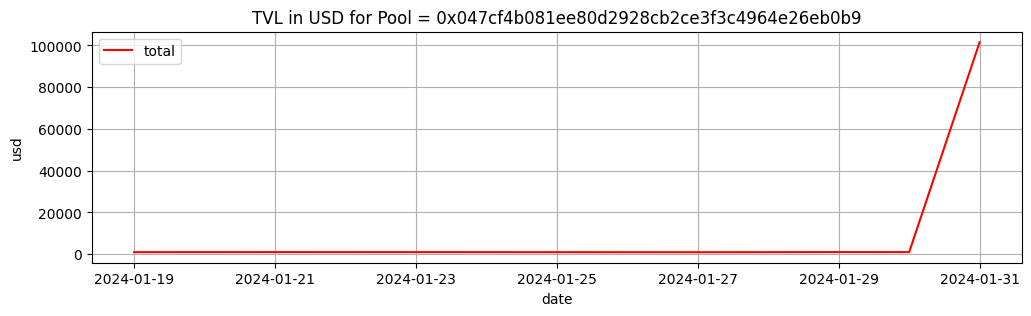

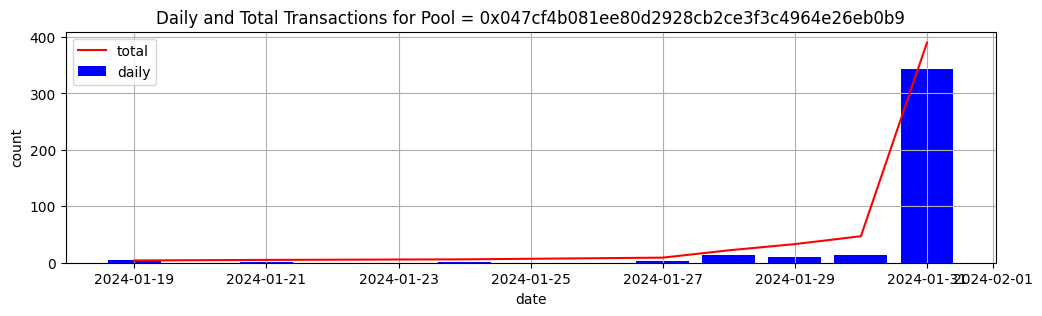

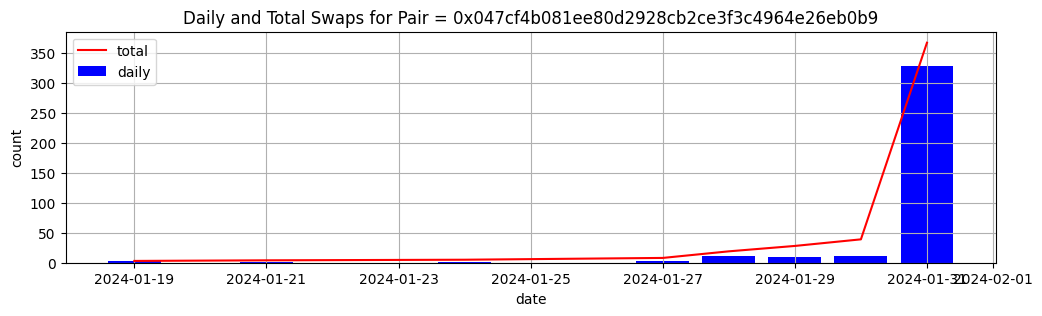

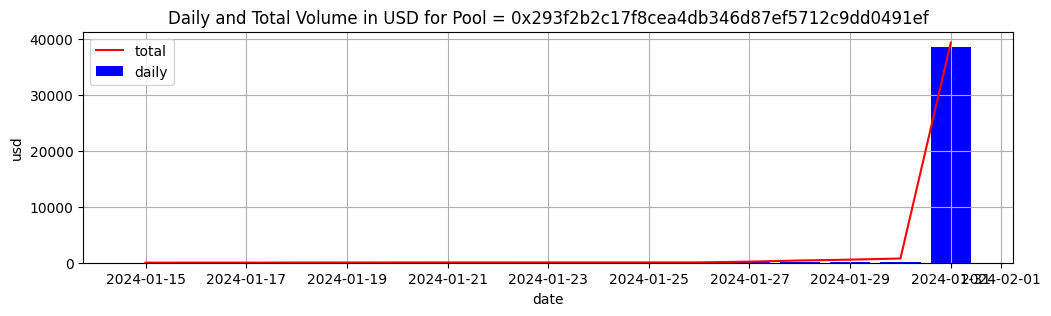

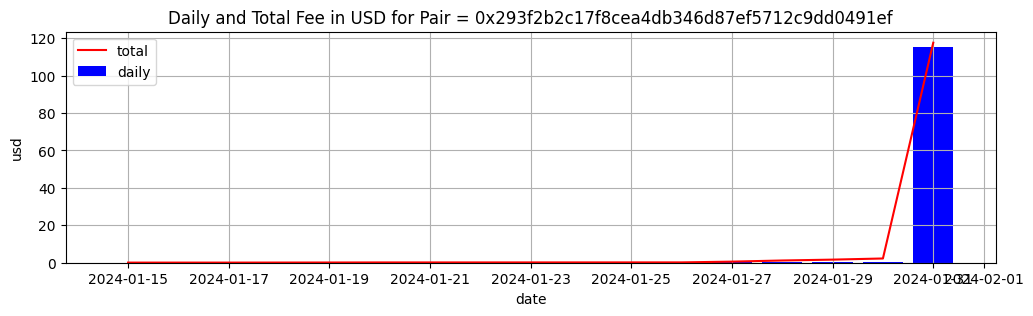

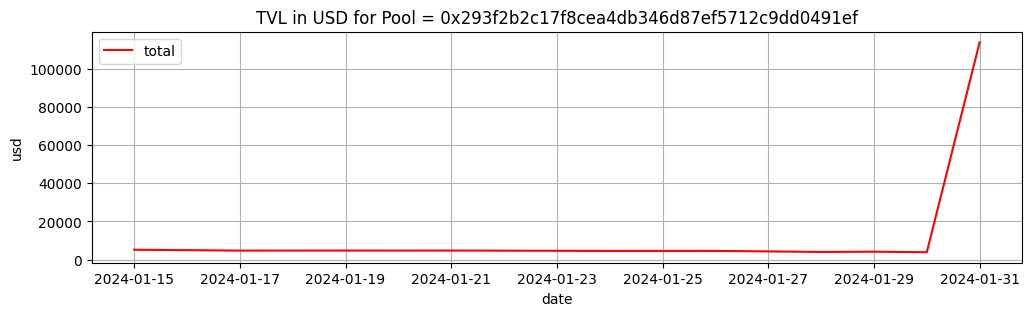

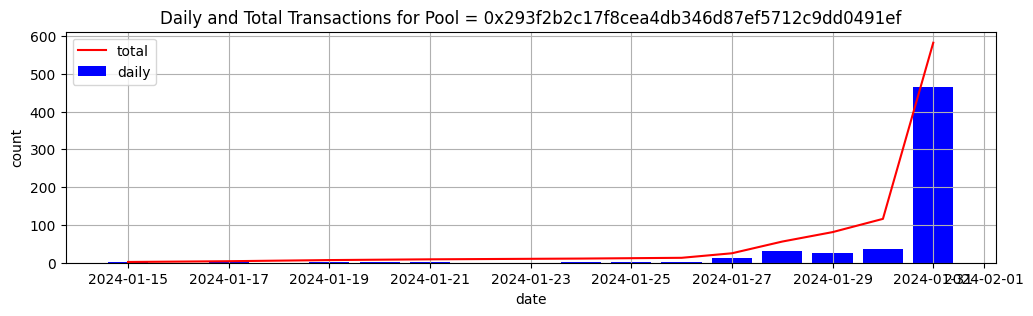

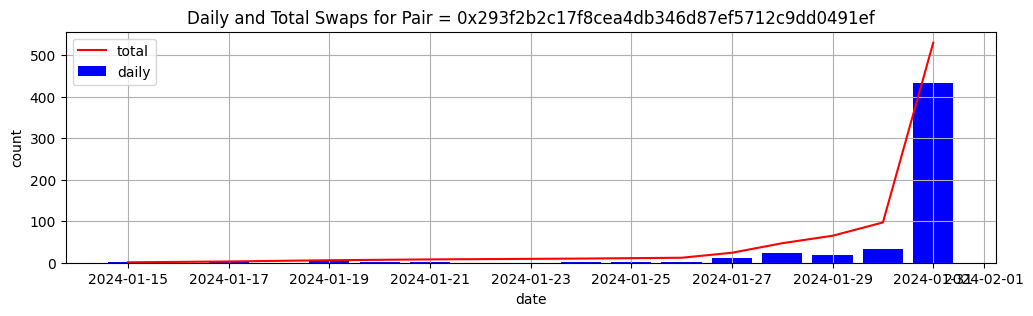

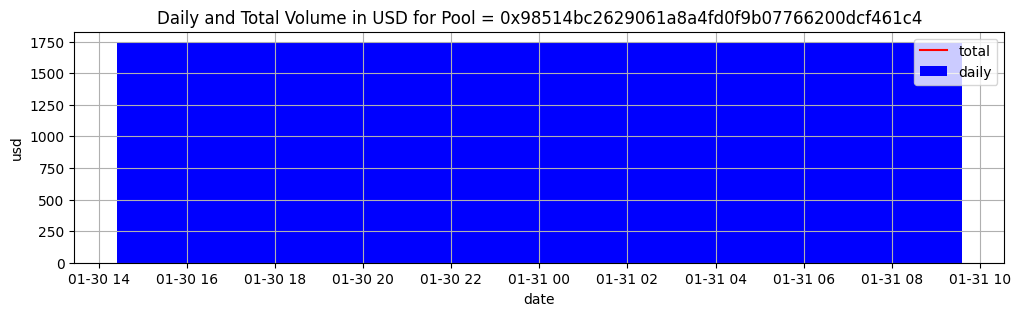

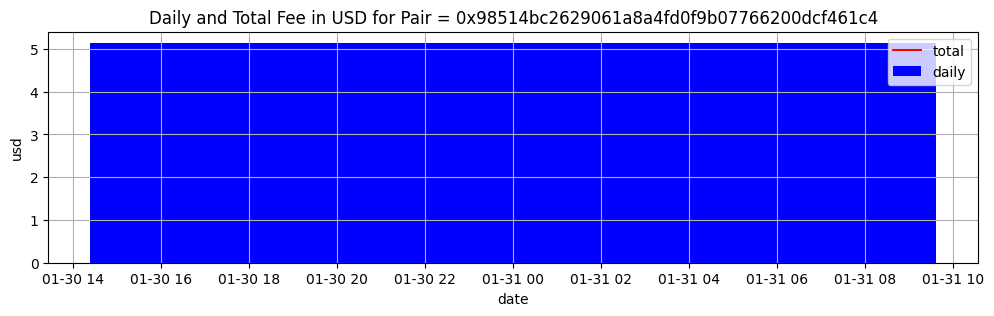

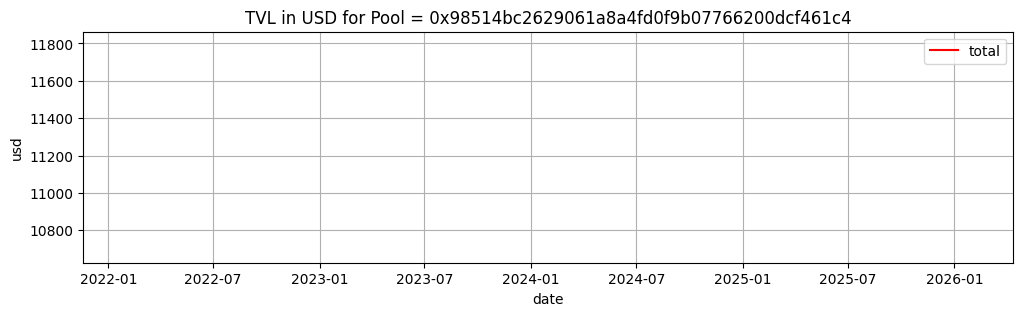

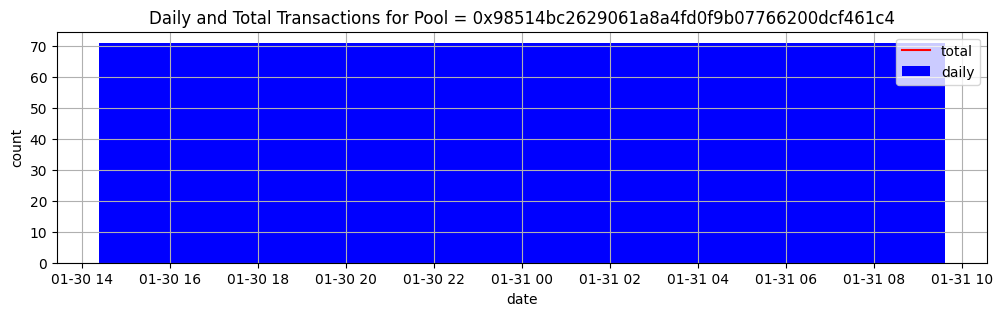

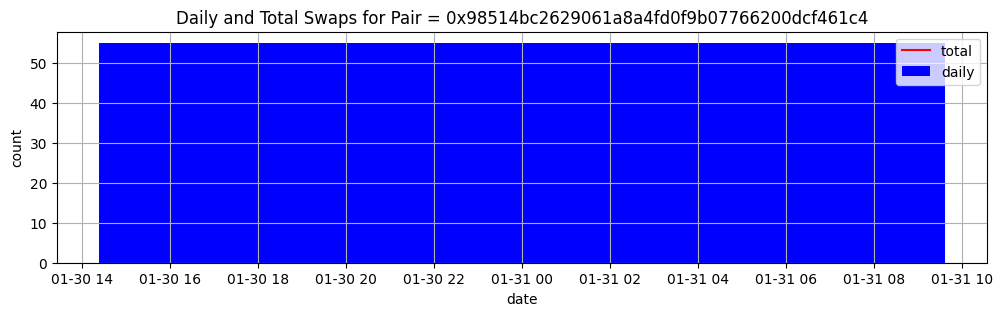

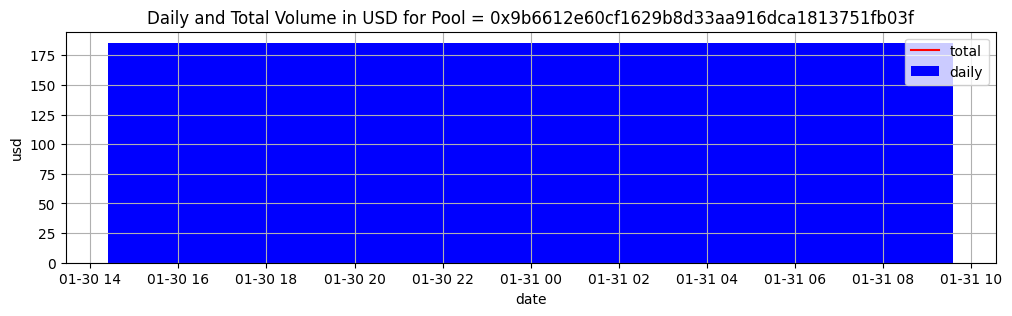

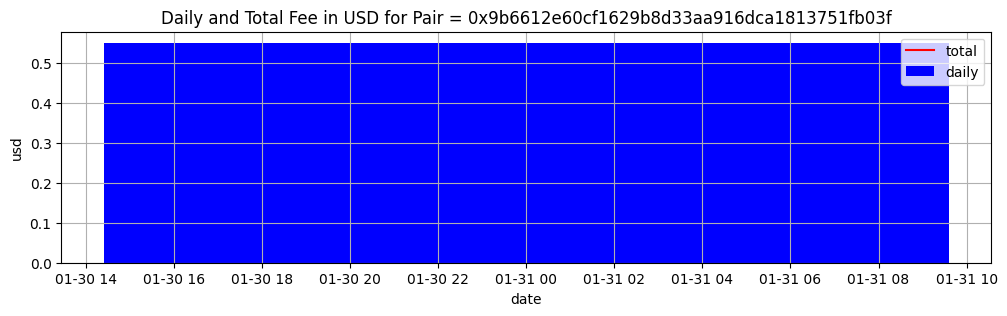

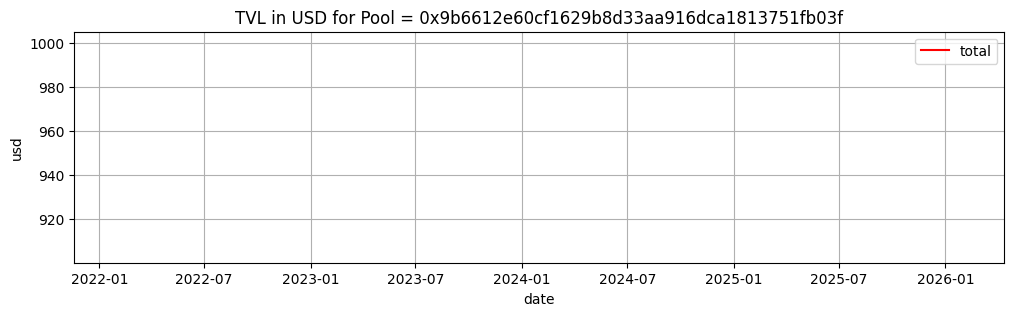

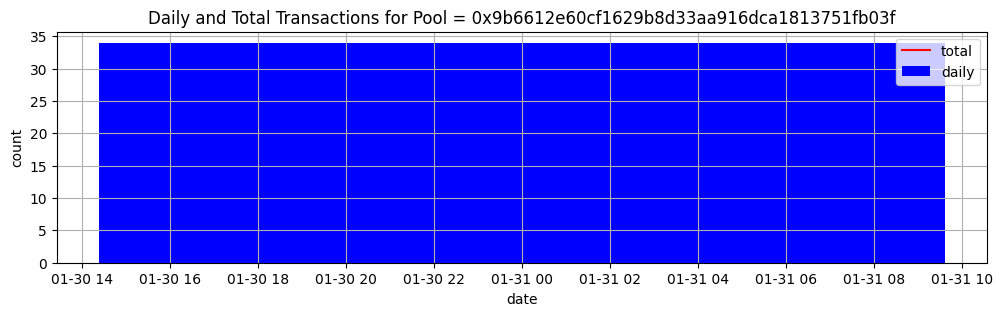

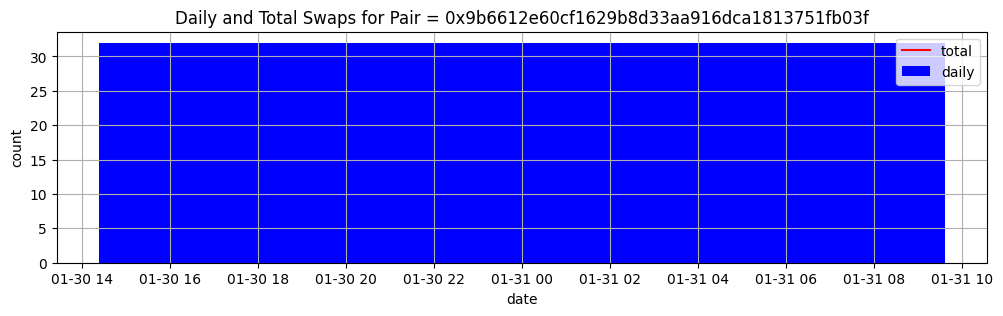

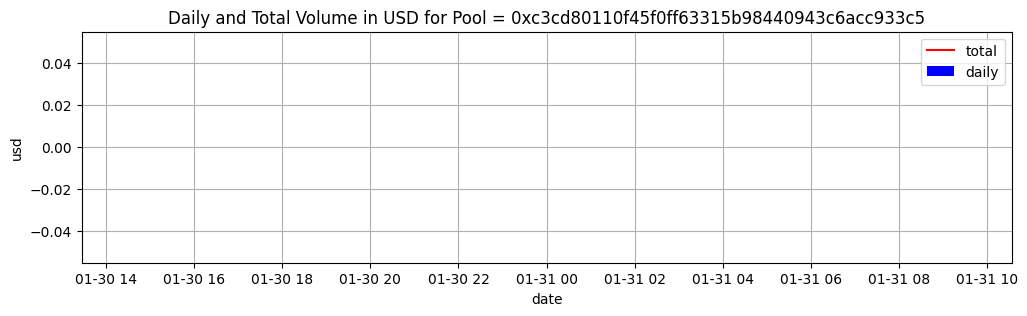

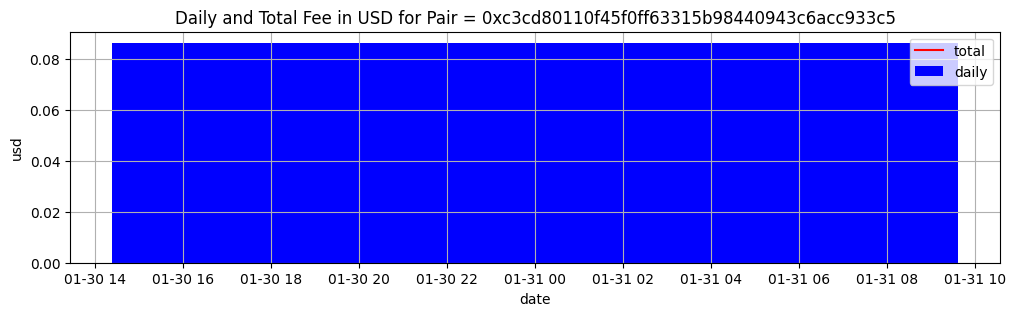

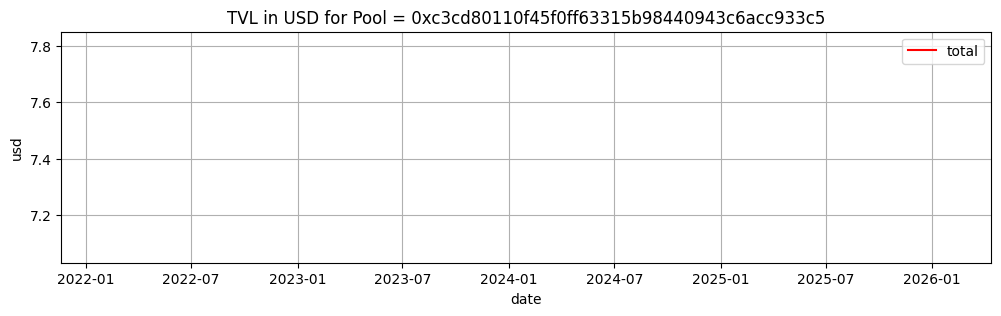

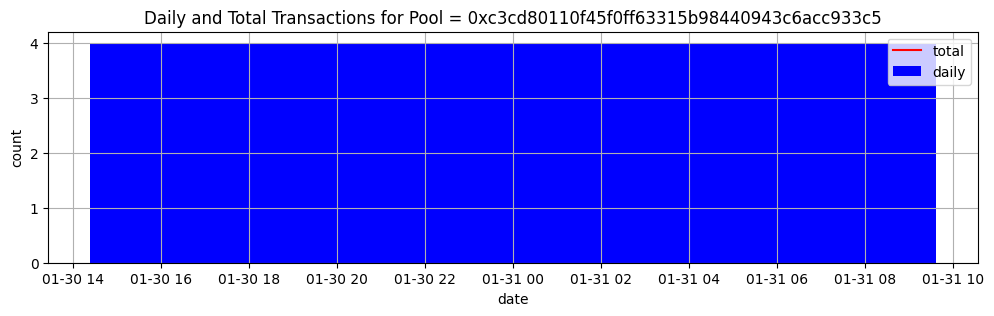

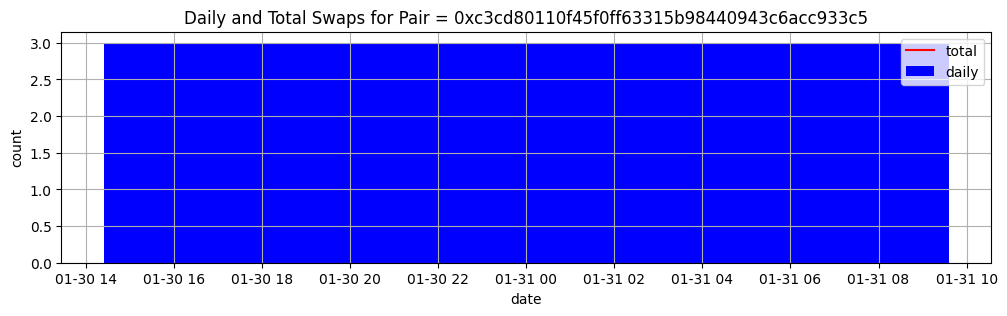

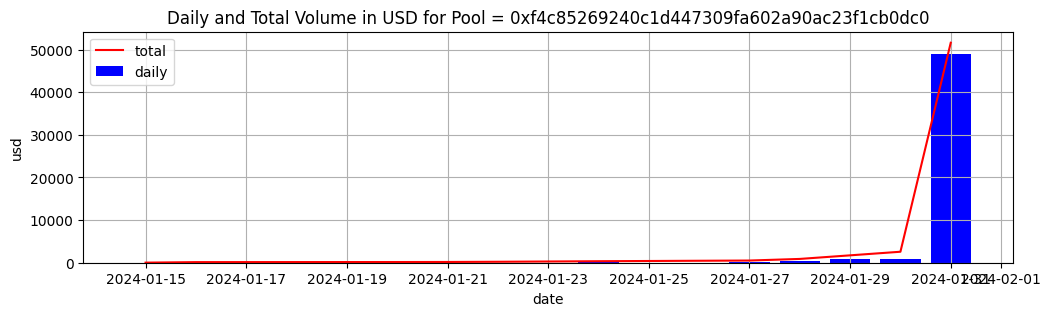

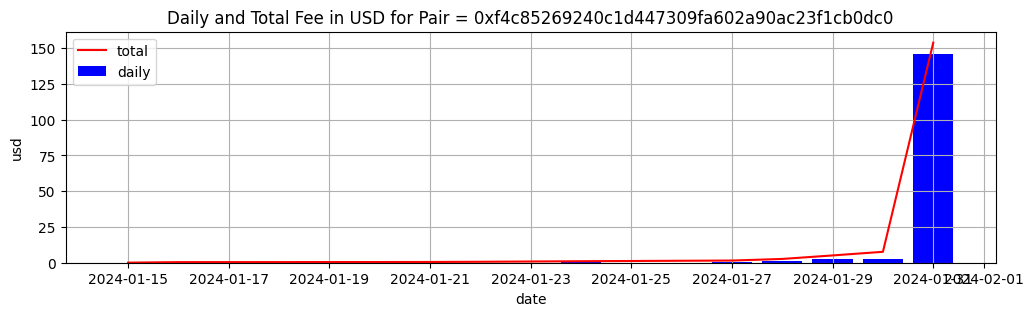

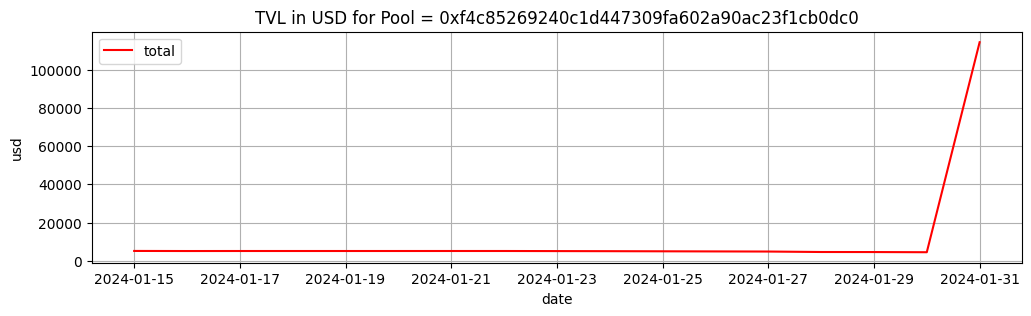

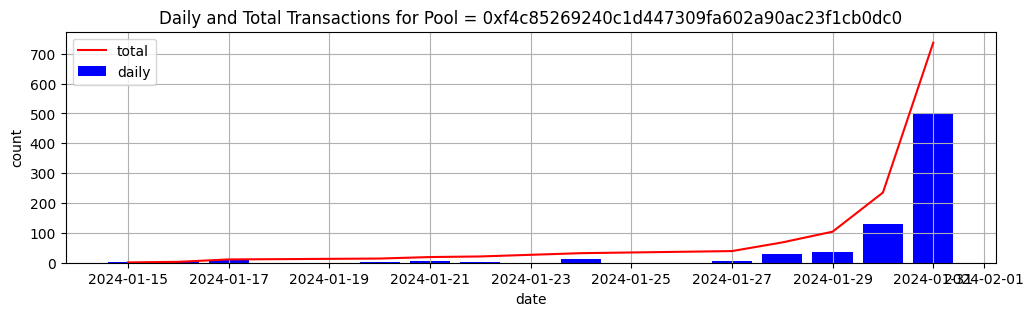

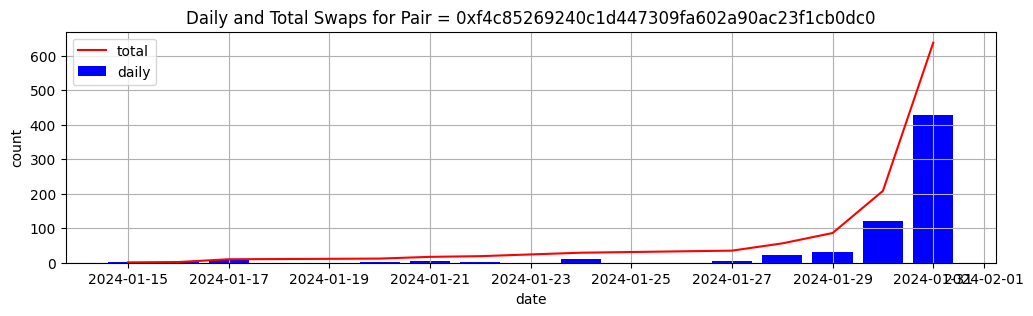

In [22]:
for (pool_id, df_g) in df_pool_day.groupby("pool_id"):
    # usd volume
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(
        df_g.index,
        df_g["dailyVolumeUSD"],
        color="blue",
        label="daily",
    )
    ax.plot(
        df_g.index,
        df_g["totalVolumeUSD"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"Daily and Total Volume in USD for Pool = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("usd")
    plt.legend()
    plt.show()

    # fees
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(
        df_g.index,
        df_g["dailyFeeUSD"],
        color="blue",
        label="daily",
    )
    ax.plot(
        df_g.index,
        df_g["totalFeeUSD"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"Daily and Total Fee in USD for Pair = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("usd")
    plt.legend()
    plt.show()

    # tvl

    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df_g.index,
        df_g["totalLiquidityUSD"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"TVL in USD for Pool = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("usd")
    plt.legend()
    plt.show()

    # transactions

    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(
        df_g.index,
        df_g["dailyTransactions"],
        color="blue",
        label="daily",
    )
    ax.plot(
        df_g.index,
        df_g["totalTransactions"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"Daily and Total Transactions for Pool = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("count")
    plt.legend()
    plt.show()

    # swaps
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(
        df_g.index,
        df_g["new_swap_count"],
        color="blue",
        label="daily",
    )
    ax.plot(
        df_g.index,
        df_g["total_swap_count"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"Daily and Total Swaps for Pair = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("count")
    plt.legend()
    plt.show()